# Analysis of apartments available to rent  in Wrocław on 17/03/2023

## Required packages

In [ ]:
%pip install pandas matplotlib numpy scipy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Loading and cleaning the data

The file `mieszkania-wroclaw.csv` contains a dataset of all the listings for apartments to rent in Wrocław, taken on 13/07/2023.
The file has the following structure:
- `title`: The title of the listing
- `location`: The approximate area within Wrocław the apartment is located
- `rent_per_month`: The monthly rent, in PLN
- `rooms`: The number of rooms in the apartment
- `area_sq_m`: The area in m^2 of the apartment
- `czynsz`: Varies on letting to letting, generally covers building administration fees and things like TV, waste disposal, heating etc.
- `url`: The relative URL for the listing on https://otodom.pl

In [2]:
# Load the CSV file
apartments = pd.read_csv("mieszkania-wroclaw.csv", on_bad_lines="warn")
# Set the numeric fields to be numeric instead of string
apartments["rent_per_month"] = pd.to_numeric(apartments["rent_per_month"])
apartments["rooms"] = pd.to_numeric(apartments["rooms"])
apartments["area_sq_m"] = pd.to_numeric(apartments["area_sq_m"])
# Filter out junk postings with unrealistically low rent
apartments = apartments[apartments.rent_per_month > 100]
# If an apartment's location is in 'dolnośląskie' or 'Wrocław',
# it means the person who posted it didn't include the proper location.
# This could be parsed from the body of the posting but would require
# additional scraping, so for the moment they get disregarded.
apartments = apartments[apartments.location != "dolnośląskie"]
apartments = apartments[apartments.location != "Wrocław"]
apartments.drop_duplicates()
# Print out how many rows and columns are now in the data set, after cleaning
apartments.shape



(2130, 7)

## How many apartments are there for rent in Wrocław?

In [3]:
apartments_per_location = (
    apartments.groupby("location", as_index=True)
    .location.agg("count")
    .to_frame("count")
    .reset_index()
    .sort_values(by="count", ascending=False)
)
apartments_per_location


,location,count
1,Krzyki,791
0,Fabryczna,415
5,Stare Miasto,330
6,Śródmieście,298
3,Psie Pole,247
2,Nadodrze,25
4,Rynek,24


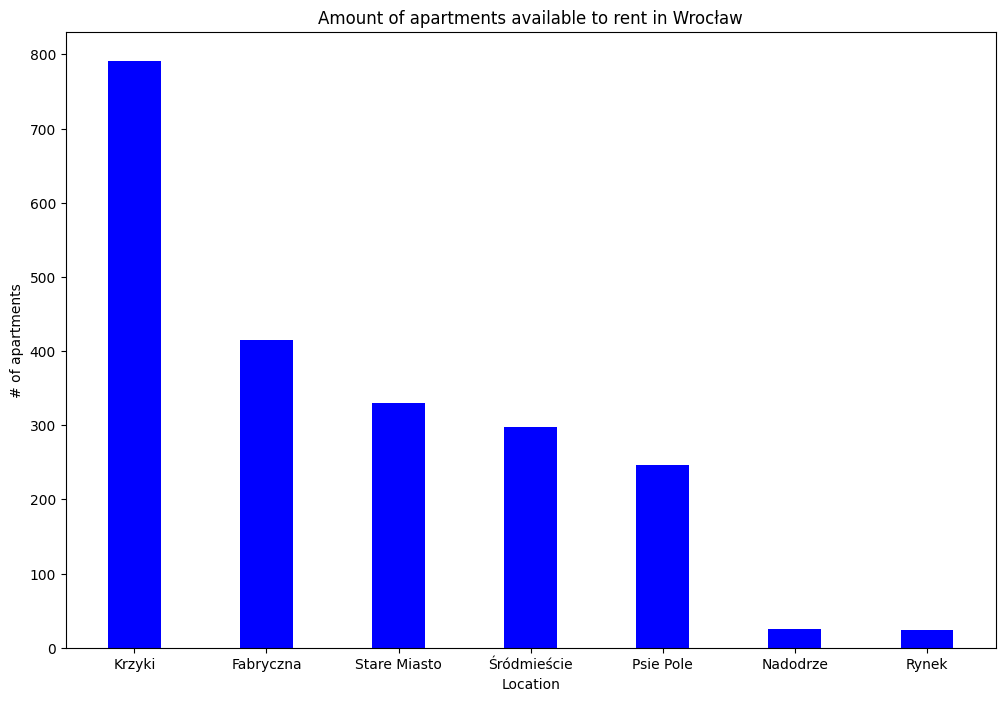

In [4]:
fig = plt.figure(figsize=(12, 8))

plt.bar(
    apartments_per_location["location"],
    apartments_per_location["count"],
    color="b",
    width=0.4,
)

plt.xlabel("Location")
plt.ylabel("# of apartments")
plt.title("Amount of apartments available to rent in Wrocław")

plt.show()


We can visualise the proportions relative to eachother using a pie chart.

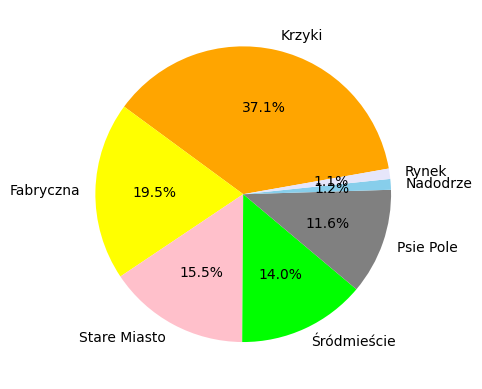

In [5]:
pie_chart_colors=['orange','yellow','pink','lime','gray','skyblue','lavender']

plt.pie(
    apartments_per_location["count"],
    autopct="%1.1f%%",
    labels=apartments_per_location["location"],
    startangle=10,
    colors=pie_chart_colors,
)

plt.show()


## Mean and median rent prices by location

First off, we can take a look at the mean and median values by location for renting an apartment.  
We would expect to see here that areas closer to the city center (Stare Miasto, Śródmieście) would cost more than places further away like Psie Pole and Krzyki.
The below map shows the different areas of Wrocław (Rynek and Nadodrze aren't picture but are both very close to the city center).
<div>
  <img src="https://upload.wikimedia.org/wikipedia/commons/5/52/Wroclaw_city_districts.png" width="500"/>
</div>


The mean is the average cost of rent in each area, which can be affected by outliers

In [6]:
rent_by_location = apartments[["location", "rent_per_month"]]

mean_rent_per_location = rent_by_location.groupby("location", as_index=False).mean()

mean_rent_per_location.sort_values(by="rent_per_month", ascending=False)



,location,rent_per_month
4,Rynek,3795.416667
6,Śródmieście,3420.063758
5,Stare Miasto,3389.754545
1,Krzyki,3293.150442
2,Nadodrze,3264.360000
0,Fabryczna,2991.356627
3,Psie Pole,2980.429150


As expected, apartments in Rynek (the market square in the middle of the city) are on average more expensive than apartments out in Psie Pole.  

The median is the "middle value" in the set of numbers, so if the rents are [100,150,200,300,800] then the median is 200.  
This helps to show when the mean is heavily affected by outliers, such as 800 in this case.  

In [7]:
median_rent_per_location = rent_by_location.groupby("location", as_index=False).median()

median_rent_per_location.sort_values(by="rent_per_month", ascending=False)


,location,rent_per_month
4,Rynek,3600.0
2,Nadodrze,3000.0
5,Stare Miasto,3000.0
6,Śródmieście,3000.0
1,Krzyki,2950.0
0,Fabryczna,2800.0
3,Psie Pole,2800.0


### Let's visualise how the mean and mode stack up against each other on a per location basis

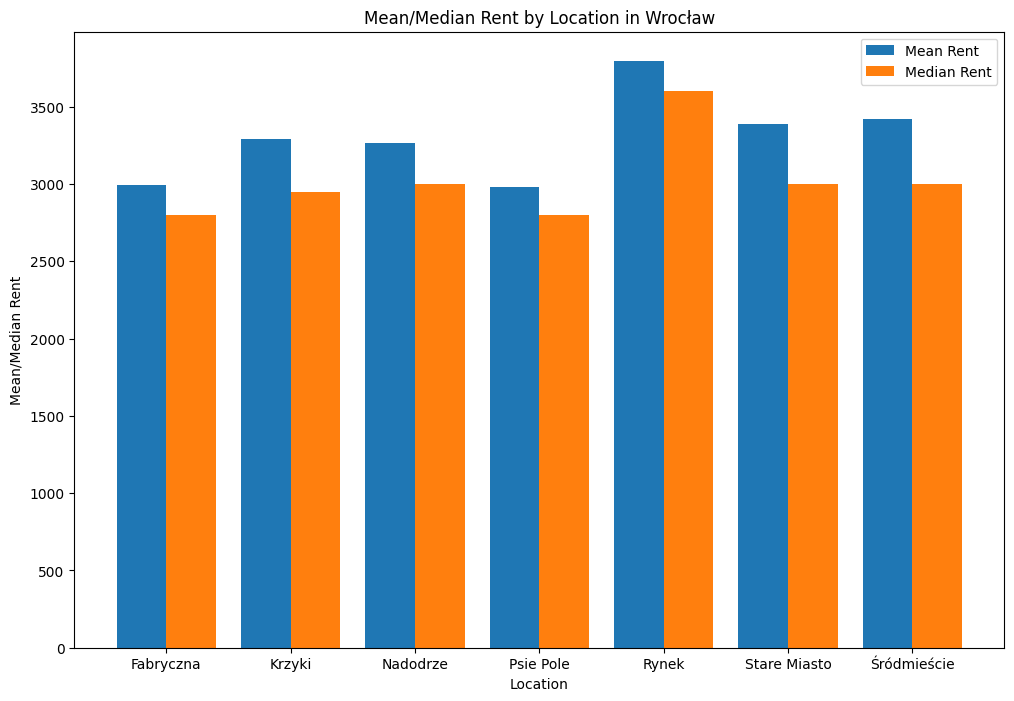

In [8]:
fig = plt.figure(figsize=(12, 8))

locations = mean_rent_per_location["location"]
mean_rent = mean_rent_per_location["rent_per_month"]
median_rent = median_rent_per_location["rent_per_month"]

x_axis = np.arange(len(locations))

plt.bar(x_axis - 0.2, mean_rent, 0.4, label="Mean Rent")
plt.bar(x_axis + 0.2, median_rent, 0.4, label="Median Rent")

plt.xticks(x_axis, locations)
plt.xlabel("Location")
plt.ylabel("Mean/Median Rent")
plt.title("Mean/Median Rent by Location in Wrocław")
plt.legend()

plt.show()


We can see from this that they are mostly in sync, but certain areas are more affected by outliers than others, like Śródmieście.

Another way we can visualise these dispersions is with a boxplot, which will let us see where the outliers are.  

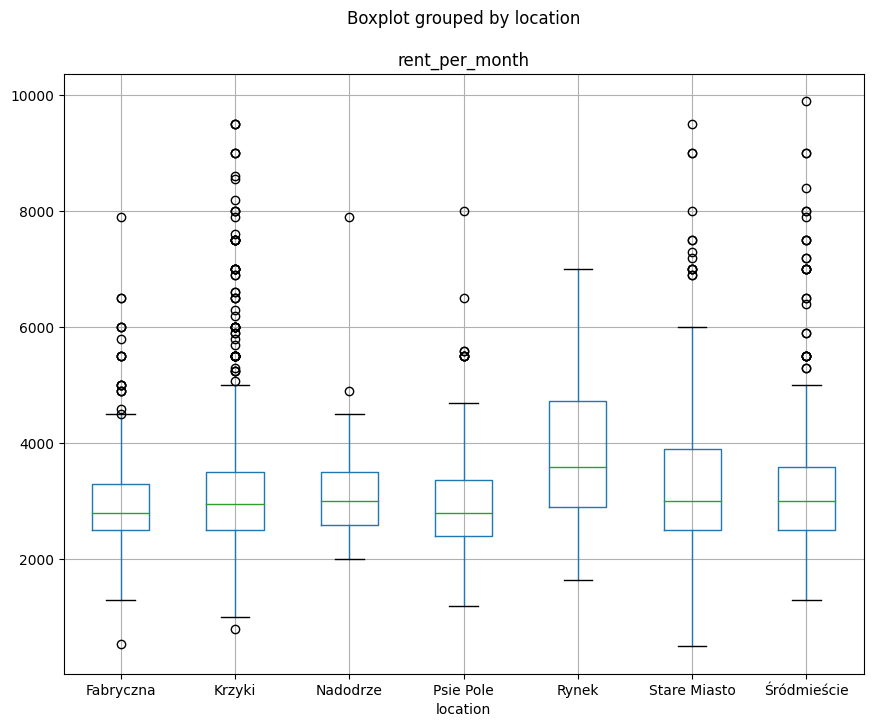

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.suptitle("")

apartments.boxplot(column=["rent_per_month"], by="location", ax=ax)

plt.show()


We can do the same thing for area and number of rooms too

In [10]:
median_per_location = (
    apartments[["location", "area_sq_m", "rooms"]]
    .groupby("location", as_index=False)
    .median()
)
median_per_location


,location,area_sq_m,rooms
0,Fabryczna,48.0,2.0
1,Krzyki,48.0,2.0
2,Nadodrze,48.0,2.0
3,Psie Pole,48.0,2.0
4,Rynek,48.5,2.0
5,Stare Miasto,42.0,2.0
6,Śródmieście,48.0,2.0


In [11]:
mean_per_location = (
    apartments[["location", "area_sq_m", "rooms"]]
    .groupby("location", as_index=False)
    .mean()
)
mean_per_location


,location,area_sq_m,rooms
0,Fabryczna,50.650361,2.236145
1,Krzyki,52.376308,2.254109
2,Nadodrze,45.220000,2.000000
3,Psie Pole,50.049838,2.226721
4,Rynek,53.696667,1.958333
5,Stare Miasto,44.845273,2.018182
6,Śródmieście,53.166409,2.144295


## Is there a correlation between rent prices and apartment sizes?

We can calculate the correlation coefficient using a couple of different libraries

In [12]:
# Using pandas
apartments['rent_per_month'].corr(apartments['area_sq_m'])


0.7463058031692359

In [13]:
# Using numpy
np.corrcoef(apartments['rent_per_month'],apartments['area_sq_m'])


array([[1.       , 0.7463058],
       [0.7463058, 1.       ]])

In [14]:
# Using pearsonr from scipy.stats
from scipy.stats import pearsonr

pearsonr(apartments['rent_per_month'],apartments['area_sq_m'])


PearsonRResult(statistic=0.7463058031692367, pvalue=0.0)

The correlation coefficient ranges between -1 to +1, so a value very close to +1 demonstrates that rent prices and apartment sizes are strongly positively correlated.  
Additionaly, a `pvalue` of < 0.05 indicates a strong confidence in the result.

### Visualising correlation

We can visualise this correlation using a scatterplot

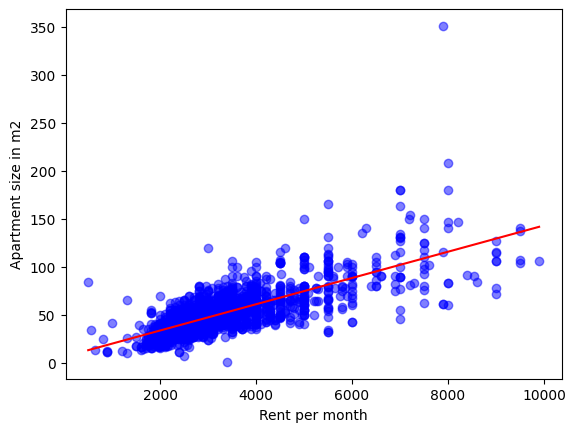

In [15]:
# Create a scatterplot
plt.scatter(apartments["rent_per_month"], apartments["area_sq_m"], color="b", alpha=0.5)
# Plot the correlation as a line
# https://stackoverflow.com/a/37294651
plt.plot(
    np.unique(apartments["rent_per_month"]),
    np.poly1d(np.polyfit(apartments["rent_per_month"], apartments["area_sq_m"], 1))(
        np.unique(apartments["rent_per_month"]) 
    ),
    c="r",
)

plt.xlabel("Rent per month")
plt.ylabel("Apartment size in m2")

plt.show()


With this line and scatterplot, we can also observe the strong positive correlation.

## Supply and Demand

We can also check if there's a correlation between the average rent of an area vs how many apartments there are available to rent.  

In [16]:
rent_vs_supply = pd.merge(
    left=apartments_per_location, right=mean_rent_per_location, on="location"
)
np.corrcoef(rent_vs_supply["rent_per_month"], rent_vs_supply["count"])


array([[ 1.        , -0.33524065],
       [-0.33524065,  1.        ]])

If we just used Numpy to calculate the correlation coefficient, we might be temped to say that supply and demand are negatively correlated.  
However, if we instead use PearsonR from scipy, we get a better idea of the fully story.  

In [17]:
pearsonr(rent_vs_supply['rent_per_month'], rent_vs_supply['count'])

PearsonRResult(statistic=-0.3352406484683886, pvalue=0.4623119750641196)

With a very high `pvalue` of 0.46, this demonstrates a very low confidence in the result.  
We can also see from this scatterplot that there doesn't appear to be much correlation at all.  

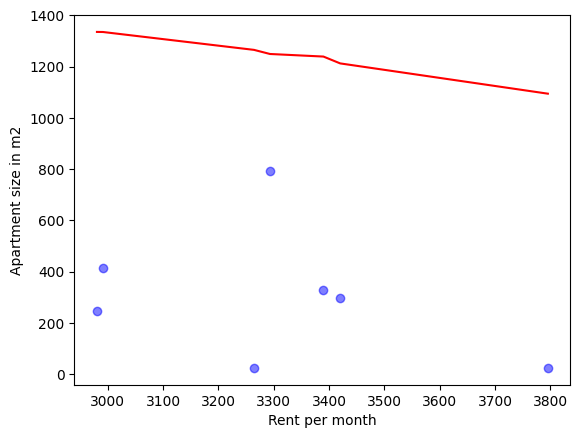

In [18]:
# Create a scatterplot
plt.scatter(
    rent_vs_supply["rent_per_month"], rent_vs_supply["count"], color="b", alpha=0.5
)
# Plot the correlation as a line
# https://stackoverflow.com/a/37294651
plt.plot(
    np.unique(rent_vs_supply["rent_per_month"]),
    np.poly1d(np.polyfit(rent_vs_supply["rent_per_month"], rent_vs_supply["count"], 1))(
        np.unique(rent_vs_supply["count"])
    ),
    c="r",
)

plt.xlabel("Rent per month")
plt.ylabel("Apartment size in m2")

plt.show()


This could be due to the very small sample size (7 in this case) and there is possibly a better way of testing this hypothesis with more granular location information.  

## Key takeaways

- There is a disproportionate amount of apartments to rent in Krzyki
- Apartments across Wrocław are, on average, roughly the same size (between 42 to 48 m^2) and have the same amount of rooms (2)
- Rent is higher the closer you are to the city center
- The cheapest places to rent appear to be Fabryczna and Psie Pole, with Rynek and Śródmieście being the most expensive
- The large supply of available accomodation in Krzyki does not appear to affect the price of renting there 
